# *Deep Learning Basics with PyTorch*
# Part I — Foundations of Machine Learning
## Chapter 1: Machine Learning Overview

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')  # plotting
%config InlineBackend.figure_format = 'retina'

### Section 1.1 - Minimal Linear Regression

In [2]:
X = np.array([[0.0], [1.0], [2.0], [3.0]], dtype=float)  # inputs
y = np.array([0.0, 1.0, 2.1, 2.9], dtype=float)  # targets

model = LinearRegression().fit(X, y)
coef = model.coef_.ravel().tolist()
intercept = float(model.intercept_)

print(f"coef = {coef}  intercept = {intercept:.3f}")

pred = model.predict(X)
for xi, yi, pi in zip(X.ravel(), y, pred):
    print(f"x = {xi:.1f}  y = {yi:.2f}  pred = {pi:.2f}")

coef = [0.9799999999999998]  intercept = 0.030
x = 0.0  y = 0.00  pred = 0.03
x = 1.0  y = 1.00  pred = 1.01
x = 2.0  y = 2.10  pred = 1.99
x = 3.0  y = 2.90  pred = 2.97


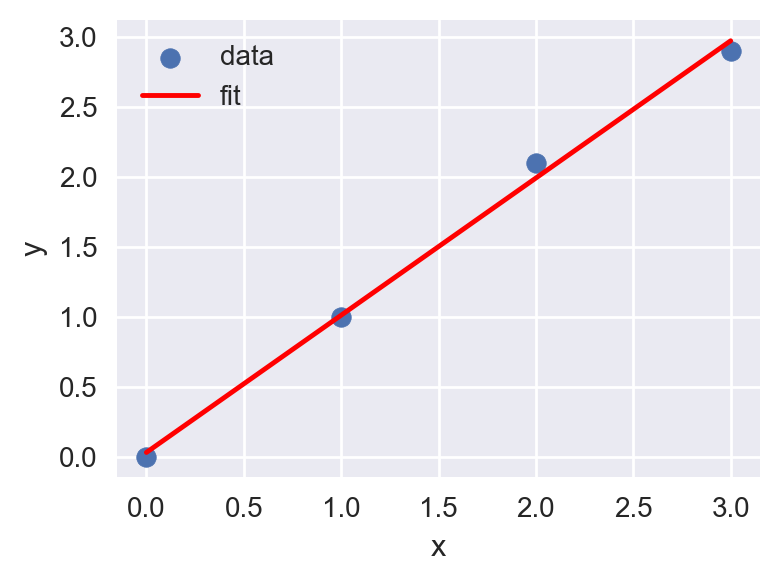

In [3]:
plt.figure(figsize=(4, 3))
plt.scatter(X, y, label='data')
xx = np.linspace(0, 3, 50).reshape(-1, 1)
plt.plot(xx, model.predict(xx), 'r-', label='fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()

#### What it teaches:
- The data → model → fit → prediction → visualization workflow.
- Manual inspection of coefficients, intercepts, and predictions.

## Section 1.2 - Train/Test Split and MAE Evaluation

In [4]:
rng = np.random.default_rng(0)  # reproducible noise
X = np.linspace(0, 4, 20, dtype=float).reshape(-1, 1)
noise = rng.normal(0, 0.05, size=X.shape[0])
y = 0.95 * X.ravel() + 0.1 + noise

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Test MAE: {mae:.4f}")

Test MAE: 0.0142


## Excercises
#### Load and Prepare Data

In [5]:
df = pd.read_csv("adr_prices_and_vol.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

#### Pick a Single Ticker (e.g. CPA)

In [6]:
ticker = "CPA"

# Build a mini DataFrame for this ticker
df_t = df[['Date', f"{ticker}_Price"]].dropna().copy()
df_t.rename(columns={f"{ticker}_Price": "Price"}, inplace=True)

#### Create Next-Day Target (y = tomorrow’s price)

In [7]:
df_t['Next_Price'] = df_t['Price'].shift(-1)
df_t = df_t.dropna(subset=['Next_Price'])

#### Define Features (X) and Target (y)

In [8]:
X = df_t[['Price']].values
y = df_t['Next_Price'].values

#### Train/Test Split and Model Fit

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

print(f"Ticker: {ticker}")
print(f"Coef: {model.coef_[0]:.4f}, Intercept: {model.intercept_:.4f}")
print(f"Test MAE: {mae:.6f}")

Ticker: CPA
Coef: 0.9957, Intercept: 0.3410
Test MAE: 1.282851


#### Visualize Actual vs. Fitted Relationship

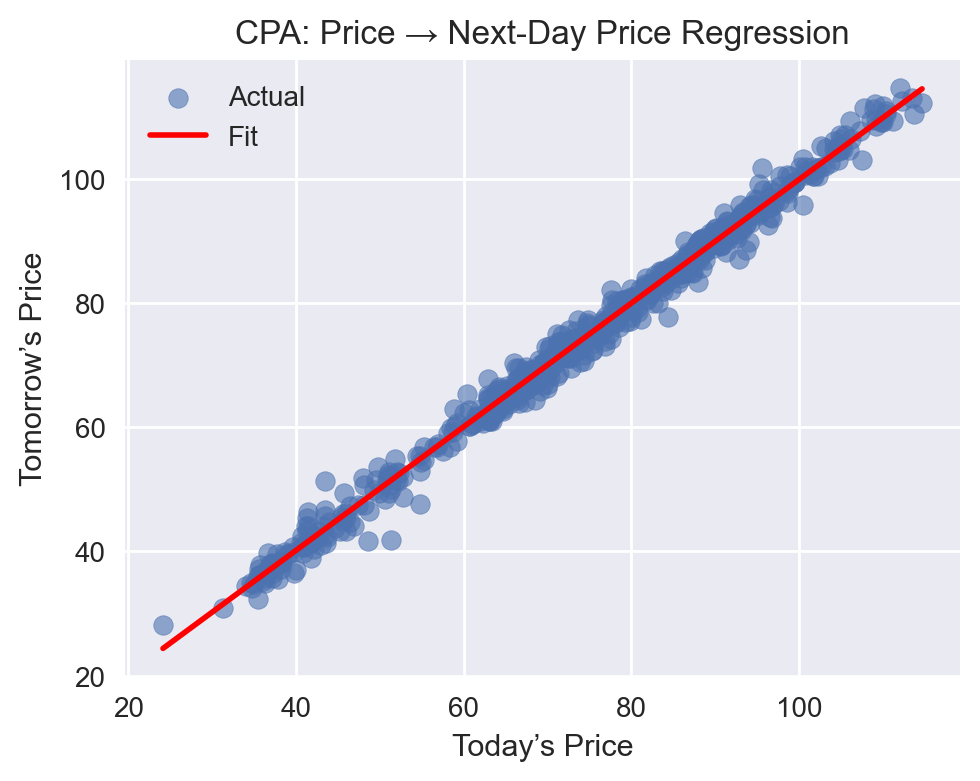

In [10]:
plt.figure(figsize=(5, 4))
plt.scatter(X_test, y_test, alpha=0.6, label='Actual')
plt.plot(np.sort(X_test, axis=0),
         model.predict(np.sort(X_test, axis=0)),
         color='red', lw=2, label='Fit')
plt.xlabel("Today’s Price")
plt.ylabel("Tomorrow’s Price")
plt.title(f"{ticker}: Price → Next-Day Price Regression")
plt.legend()
plt.tight_layout()
plt.show()

#### What This Demonstrates
“The data → model → fit → prediction → visualization workflow.”

- **Input:** today’s close price

- **Output:** next-day close

- **Model:** LinearRegression (interpretable slope ≈ persistence)

- **Metric:** Mean Absolute Error

- **Visualization:** Actual vs. fitted line